In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# Read input data
inp_exp = pd.read_csv('Expedia_train.csv')
inp_exp.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66.0,348.0,48862.0,2234.2641,12.0,0.0,1.0,...,0.0,1.0,8250.0,1.0,0.0,3.0,2.0,50.0,628.0,1.0
1,2014-08-11 08:22:12,2,3,66.0,348.0,48862.0,2234.2641,12.0,0.0,1.0,...,0.0,1.0,8250.0,1.0,1.0,1.0,2.0,50.0,628.0,1.0
2,2014-08-11 08:24:33,2,3,66.0,348.0,48862.0,2234.2641,12.0,0.0,0.0,...,0.0,1.0,8250.0,1.0,0.0,1.0,2.0,50.0,628.0,1.0
3,2014-08-09 18:05:16,2,3,66.0,442.0,35390.0,913.1932,93.0,0.0,0.0,...,0.0,1.0,14984.0,1.0,0.0,1.0,2.0,50.0,1457.0,80.0
4,2014-08-09 18:08:18,2,3,66.0,442.0,35390.0,913.6259,93.0,0.0,0.0,...,0.0,1.0,14984.0,1.0,0.0,1.0,2.0,50.0,1457.0,21.0


In [3]:
# Select columns to be used for training
inp_exp = inp_exp[['date_time','site_name','orig_destination_distance','srch_adults_cnt','srch_children_cnt','is_package','hotel_cluster']]

# Change the data type of the column 
inp_exp['date_time'] = pd.to_datetime(inp_exp['date_time'])

# Drop rows with NUll values
inp_exp.dropna(inplace=True)

In [4]:
#Split data into train and test dataset
exp_train, exp_test = train_test_split(inp_exp, test_size=0.20,
                                       random_state=101)

X_train = exp_train[['date_time','site_name','orig_destination_distance','srch_adults_cnt','srch_children_cnt','is_package']]
Y_train = exp_train[['hotel_cluster']]

X_test = exp_test[['date_time','site_name','orig_destination_distance','srch_adults_cnt','srch_children_cnt','is_package']]
Y_test = exp_test[['hotel_cluster']]

In [5]:
# Transformation for train dataset
X_train['BookYear'] = X_train.date_time.dt.year
X_train['BookMonth'] = X_train.date_time.dt.month
X_train['BookDay'] = X_train.date_time.dt.day
X_train['BookHour'] = X_train.date_time.dt.hour
X_train['BookWkDayName'] = X_train.date_time.dt.day_name()

X_train.drop(['date_time'],axis=1, inplace=True)

# Transformation for test dataset
X_test['BookYear'] = X_test.date_time.dt.year
X_test['BookMonth'] = X_test.date_time.dt.month
X_test['BookDay'] = X_test.date_time.dt.day
X_test['BookHour'] = X_test.date_time.dt.hour
X_test['BookWkDayName'] = X_test.date_time.dt.day_name()

X_test.drop(['date_time'],axis=1, inplace=True)

In [6]:
X_train.head()

,site_name,orig_destination_distance,srch_adults_cnt,srch_children_cnt,is_package,BookYear,BookMonth,BookDay,BookHour,BookWkDayName
3604,8,1317.1723,2.0,1.0,0.0,2013,12,4,14,Wednesday
2199,13,6483.8538,2.0,0.0,0.0,2014,3,30,12,Sunday
3411,2,1408.4226,1.0,3.0,1.0,2014,3,5,7,Wednesday
1565,2,2994.4990,2.0,0.0,1.0,2014,12,28,14,Sunday
1741,2,1771.7601,1.0,0.0,1.0,2014,9,28,6,Sunday


In [7]:
# Add categorical variables
categorical_columns = ['BookWkDayName','BookMonth']
X_train = pd.get_dummies(X_train, columns=categorical_columns, prefix_sep="_")
X_test = pd.get_dummies(X_test, columns=categorical_columns, prefix_sep="_")

#Align Test schema with train schema
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# scale train dataset
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# scale test dataset
X_test_scaled = scaler.transform(X_test)

In [8]:
X_test

,site_name,orig_destination_distance,srch_adults_cnt,srch_children_cnt,is_package,BookYear,BookDay,BookHour,BookWkDayName_Friday,BookWkDayName_Monday,...,BookMonth_3,BookMonth_4,BookMonth_5,BookMonth_6,BookMonth_7,BookMonth_8,BookMonth_9,BookMonth_10,BookMonth_11,BookMonth_12
801,13,524.0588,5.0,0.0,0.0,2014,23,15,0,0,...,0,0,0,0,1,0,0,0,0,0
1483,2,1533.0130,4.0,0.0,1.0,2014,24,7,0,0,...,0,0,0,0,1,0,0,0,0,0
1160,2,2033.6799,2.0,0.0,1.0,2014,8,11,0,0,...,0,1,0,0,0,0,0,0,0,0
2930,2,1385.8346,2.0,0.0,1.0,2014,29,20,0,0,...,1,0,0,0,0,0,0,0,0,0
1261,2,1710.4049,2.0,0.0,1.0,2014,14,19,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,2,175.0254,4.0,0.0,0.0,2013,27,13,1,0,...,0,0,0,0,0,0,1,0,0,0
912,2,328.8956,2.0,0.0,0.0,2014,11,17,0,0,...,0,0,0,0,0,0,0,1,0,0
2259,2,2234.1470,1.0,0.0,0.0,2013,7,16,0,1,...,0,0,0,0,0,0,0,0,0,0
990,11,97.0150,2.0,0.0,0.0,2014,3,13,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
# Ridge Regularization with scaling
ncoef= np.linspace(0.1,1000, num=100)

l2_cv = RidgeCV(alphas=ncoef, cv=None, store_cv_values=True)     #  , store_cv_values=True , cv=2  alphas=0.1  cv=2
l2_cv.fit(X_train_scaled,Y_train)
y_pred=l2_cv.predict(X_train_scaled)

In [10]:
rms = sqrt(mean_squared_error(y_pred, Y_train))
print('RMSE for training dataset for L2 model is :: ',rms)

RMSE for training dataset for L2 model is ::  27.94794643690689


In [11]:
ytest_pred=l2_cv.predict(X_test_scaled)
t_rms = sqrt(mean_squared_error(ytest_pred, Y_test))
print('RMSE for testing dataset for L2 model is :: ',t_rms)

RMSE for testing dataset for L2 model is ::  28.253595564338188


In [12]:
# Retrieve the coefficients for feature selection
l2_coef = l2_cv.coef_
coef = pd.Series(l2_coef[0], index = X_train.columns)

In [13]:
coef

site_name                   -0.379661
orig_destination_distance   -0.055470
srch_adults_cnt             -0.750319
srch_children_cnt            0.588588
is_package                   2.811830
BookYear                    -0.613212
BookDay                     -0.888845
BookHour                     1.315031
BookWkDayName_Friday         0.321220
BookWkDayName_Monday         0.108846
BookWkDayName_Saturday      -0.764185
BookWkDayName_Sunday        -0.201350
BookWkDayName_Thursday       0.078873
BookWkDayName_Tuesday       -0.358771
BookWkDayName_Wednesday      0.709615
BookMonth_1                  0.637838
BookMonth_2                 -0.346066
BookMonth_3                  0.233475
BookMonth_4                 -0.224871
BookMonth_5                  0.373902
BookMonth_6                  0.253109
BookMonth_7                 -0.060373
BookMonth_8                 -0.650145
BookMonth_9                  0.680097
BookMonth_10                 1.083052
BookMonth_11                -0.020805
BookMonth_12

Text(0.5, 1.0, 'Feature importance graph')

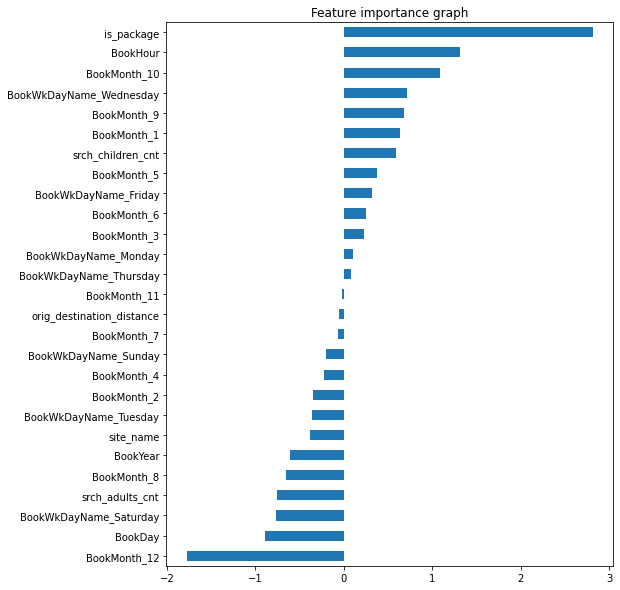

In [14]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance graph")

Text(0.5, 1.0, 'Feature importance graph asper magnitude')

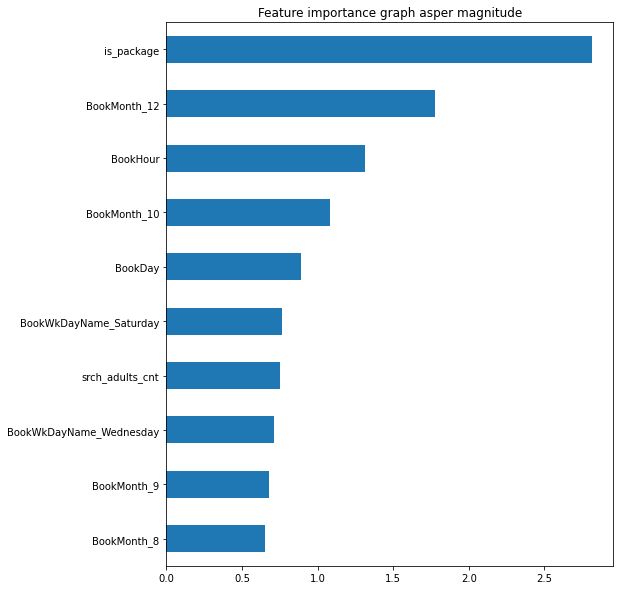

In [15]:
imp_coef_abs = abs(coef).sort_values(ascending=False).nlargest(10)
imp_coef_abs = imp_coef_abs.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef_abs.plot(kind = "barh")
plt.title("Feature importance graph asper magnitude")

In [16]:
print('coef = ', l2_cv.coef_)
print('accuracy = ', l2_cv.score(X_test_scaled,Y_test))

coef =  [[-0.37966145 -0.05546956 -0.75031911  0.58858773  2.81182984 -0.61321192
  -0.88884495  1.31503075  0.32122028  0.10884565 -0.76418487 -0.20135013
   0.07887342 -0.35877134  0.70961475  0.63783756 -0.34606598  0.23347516
  -0.22487073  0.37390212  0.25310911 -0.06037346 -0.65014484  0.68009749
   1.0830517  -0.02080546 -1.7754577 ]]
accuracy =  0.03620839252864516


# Performing prediction on Actual data
## Now we will read a new dataset and perform predictions to submit

In [17]:
# Use model to make predictions
## Read file for making prediction
predict_exp = pd.read_csv('Expedia_Test.csv')
predict_exp = predict_exp[['date_time','site_name','orig_destination_distance','srch_adults_cnt','srch_children_cnt','is_package']]


# Drop rows with NUll values
predict_exp.dropna(inplace=True)

In [18]:
# Transformation for test dataset
predict_exp['date_time'] = pd.to_datetime(predict_exp['date_time'])

predict_exp['BookYear'] = predict_exp.date_time.dt.year
predict_exp['BookMonth'] = predict_exp.date_time.dt.month
predict_exp['BookDay'] = predict_exp.date_time.dt.day
predict_exp['BookHour'] = predict_exp.date_time.dt.hour
predict_exp['BookWkDayName'] = predict_exp.date_time.dt.day_name()

predict_exp.drop(['date_time'],axis=1, inplace=True)

predict_exp = pd.get_dummies(predict_exp, columns=categorical_columns, prefix_sep="_")

#Align Test schema with train schema
X_train, predict_exp = X_train.align(predict_exp, join='left', axis=1, fill_value=0)

# scale prediction
predict_exp_scaled = scaler.transform(predict_exp)

In [19]:
predict_exp['y_out'] = l2_cv.predict(predict_exp_scaled)
predict_exp

,site_name,orig_destination_distance,srch_adults_cnt,srch_children_cnt,is_package,BookYear,BookDay,BookHour,BookWkDayName_Friday,BookWkDayName_Monday,...,BookMonth_4,BookMonth_5,BookMonth_6,BookMonth_7,BookMonth_8,BookMonth_9,BookMonth_10,BookMonth_11,BookMonth_12,y_out
0,2,5539.0567,2.0,0.0,0,2015,3,17,0,0,...,0,0,0,0,0,1,0,0,0,52.742141
1,2,5873.2923,2.0,0.0,0,2015,24,17,0,0,...,0,0,0,0,0,1,0,0,0,50.646164
2,2,3975.9776,4.0,0.0,0,2015,7,15,0,0,...,0,0,1,0,0,0,0,0,0,48.597460
3,2,1508.5975,2.0,0.0,1,2015,14,14,0,1,...,0,0,0,0,0,1,0,0,0,56.851981
4,2,66.7913,2.0,0.0,0,2015,17,9,1,0,...,0,0,0,1,0,0,0,0,0,48.034824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2,494.1257,3.0,1.0,0,2015,22,17,0,0,...,0,0,0,0,0,0,0,0,0,49.078303
251,2,7.9635,1.0,0.0,0,2015,17,11,0,1,...,0,0,0,0,1,0,0,0,0,47.113644
264,2,802.1144,2.0,0.0,0,2015,16,19,0,1,...,0,0,0,0,0,0,0,1,0,50.137158
265,2,2154.4324,2.0,0.0,0,2015,9,22,0,0,...,1,0,0,0,0,0,0,0,0,50.555631


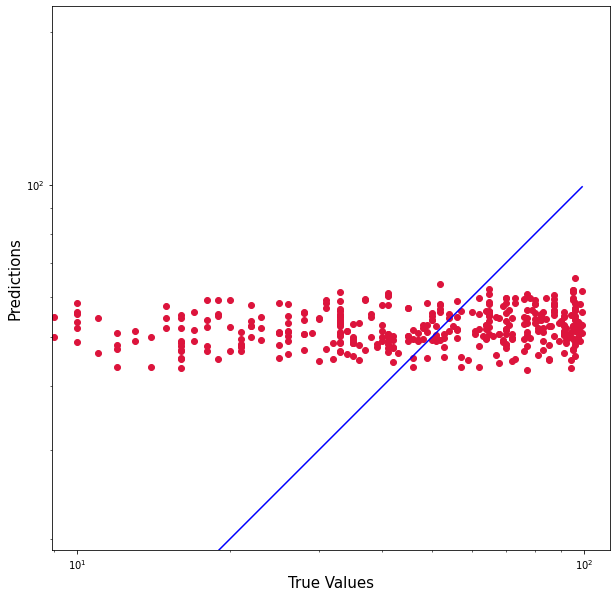

In [42]:
#plt.plot(ytest_pred, Y_test)

plt.figure(figsize=(10,10))
plt.scatter(Y_test['hotel_cluster'], df_pred['pred'], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(df_pred['pred']), max(Y_test['hotel_cluster']))
p2 = min(min(df_pred['pred']), min(Y_test['hotel_cluster']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [40]:
p1 = max(max(df_pred['pred']), max(Y_test['hotel_cluster']))
p1

99.0

In [29]:
Y_test.dtypes

hotel_cluster    float64
dtype: object

In [38]:
df_pred['pred']=pd.DataFrame(ytest_pred)

In [37]:
Y_test

,hotel_cluster
801,85.0
1483,62.0
1160,96.0
2930,9.0
1261,65.0
...,...
1313,70.0
912,95.0
2259,45.0
990,51.0
